<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Test Sigmoid, Tanh, and Relu Activations Functions on the MNIST Dataset</h1>


<h2>Table of Contents</h2>

<ul>
    <li><a href="#Model">Neural Network Module and Training Function</a></li>
    <li><a href="#Makeup_Data">Make Some Data</a></li>
    <li><a href="#Train">Define Several Neural Network, Criterion Function, and Optimizer</a></li>
    <li><a href="#Test">Test Sigmoid, Tanh, and Relu</a></li>
    <li><a href="#Result">Analyze Results</a></li>
</ul>
<p></p>
</div>

<hr>


<h2>Preparation</h2>


In [1]:
# Uncomment the following line to install the torchvision library
# !mamba install -y torchvision


import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.utils.data import DataLoader

import matplotlib.pylab as plt
import numpy as np

torch.manual_seed(1)

<h2 id="Model">Neural Network Module and Training Function</h2> 


Define the neural network module or class using the sigmoid activation function: 


In [2]:
# Build the model with sigmoid function

class Net(nn.Module):
    
    # Constructor
    def __init__(self, D_in, H, D_out):
        super(Net, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)
    
    # Prediction
    def forward(self, x):
        x = torch.sigmoid(self.linear1(x))
        x = self.linear2(x)
        return x

In [3]:
# Build the model with Tanh function

class NetTanh(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetTanh, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.tanh(self.linear1(x))
        x = self.linear2(x)
        return x

In [4]:
# Build the model with Relu function

class NetRelu(nn.Module):

    # Constructor
    def __init__(self, D_in, H, D_out):
        super(NetRelu, self).__init__()
        self.linear1 = nn.Linear(D_in, H)
        self.linear2 = nn.Linear(H, D_out)

    # Prediction
    def forward(self, x):
        x = torch.relu(self.linear1(x))
        x = self.linear2(x)
        return x

Define a function to train the model. In this case, the function returns a Python dictionary to store the training loss for each iteration  and accuracy on the validation data.


In [5]:
# Define the function for model training

def train(model, criterion, train_loader, validation_loader,
          optimizer, epochs = 100):
    i = 0
    useful_stuff = {'training_loss': [],
                    'validation_accuracy': []}

    for epoch in range(epochs):
        for i, (x, y) in enumerate(train_loader):
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
            useful_stuff['training_loss'].append(loss.item())

        correct = 0
        for x, y in validation_loader:
            z = model(x.view(-1, 28 * 28))
            _, label = torch.max(z, 1)
            correct += (label == y).sum().item()
        accuracy = 100 * (correct / len(validation_dataset))
        useful_stuff['validation_accuracy'].append(accuracy)

    return useful_stuff

<h2 id="Makeup_Data">Make Some Data</h2> 


Load the training dataset by setting the parameters <code>train</code> to <code>True</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.


In [6]:
train_dataset = dsets.MNIST(root = './data', train = True,
                            download = True, transform = transforms.ToTensor())

Load the testing dataset by setting the parameter <code>train</code> to <code>False</code> and convert it to a tensor by placing a transform object in the argument <code>transform</code>.


In [7]:
validation_dataset = dsets.MNIST(root = './data', train = False,
                                 download = True, transform = transforms.ToTensor())

In [8]:
# Create the criterion function

criterion = nn.CrossEntropyLoss()

In [9]:
# Create the training data loader and validation data loader object

train_loader = DataLoader(dataset = train_dataset,
                          batch_size = 2000, shuffle = True)

validation_loader = DataLoader(dataset = validation_dataset,
                               batch_size = 5000, shuffle = False)

<h2 id="Train">Define the Neural Network, Optimizer, and Train the Model</h2> 


Create the model with 100 hidden neurons:  


In [10]:
# Create the model object

input_dim = 28 * 28
hidden_dim = 100
output_dim = 10

model = Net(input_dim, hidden_dim, output_dim)

## Training w/ Sigmoid, Tanh, and ReLU

In [11]:
# Train a model with sigmoid function

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
training = train(model, criterion,
                 train_loader, validation_loader, optimizer, epochs = 30)

In [12]:
# Train a model with Tanh function

model_Tanh = NetTanh(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model_Tanh.parameters(), lr = learning_rate)
training_tanch = train(model_Tanh, criterion,
                       train_loader, validation_loader, optimizer, epochs = 30)

In [13]:
# Train a model with Relu function

model_Relu = NetRelu(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.SGD(model_Relu.parameters(), lr = learning_rate)
training_relu = train(model_Relu, criterion,
                      train_loader, validation_loader, optimizer, epochs = 30)

<h2 id="Result">Analyze Results</h2> 


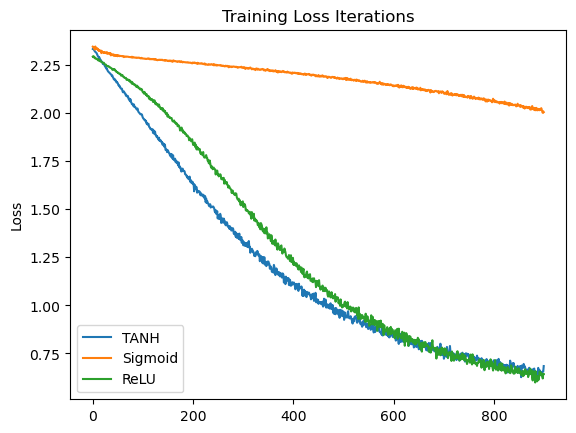

In [14]:
# Compare the training loss

plt.plot(training_tanch['training_loss'], label = 'TANH')
plt.plot(training['training_loss'], label = 'Sigmoid')
plt.plot(training_relu['training_loss'], label = 'ReLU')
plt.ylabel('Loss')
plt.title('Training Loss Iterations')
plt.legend()
plt.show()

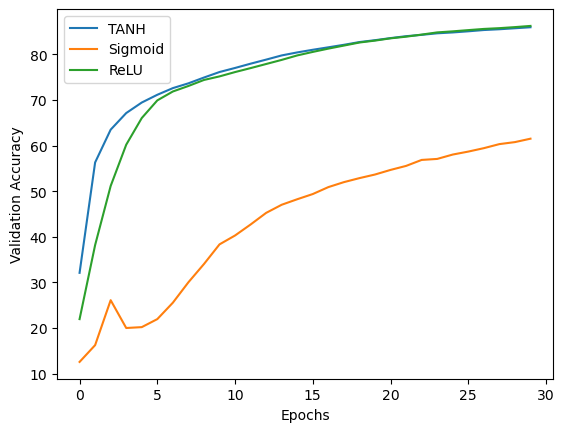

In [15]:
# Compare the validation loss

plt.plot(training_tanch['validation_accuracy'], label = 'TANH')
plt.plot(training['validation_accuracy'], label = 'Sigmoid')
plt.plot(training_relu['validation_accuracy'], label = 'ReLU')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.legend()
plt.show()